In [5]:
%matplotlib inline
import geopandas
import pandas
import os
import glob

import dateutil
import datetime

from simpledbf import Dbf5
import pandas_access as mdb


pandas.set_option("display.max_columns",999)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [31]:
download_links =[{'file':'codes','file_type':'access','daily_update':False,'url':'http://data.stlouis-mo.gov/downloads/codes.zip'},
                 {'file':'parcels','file_type':'shapefile','daily_update':False,'url':'http://data.stlouis-mo.gov/downloads/prcl_shape.zip'},
                 {'file':'blocks','file_type':'shapefile','daily_update':False,'url':'http://data.stlouis-mo.gov/downloads/blocks_shape.zip'},
                 {'file':'neighborhoods_wards','file_type':'shapefile','daily_update':False,'url':'http://data.stlouis-mo.gov/downloads/nbrhds_wards.zip'},
                 {'file':'historic_districs','file_type':'shapfile','daily_update':False,'url':'http://data.stlouis-mo.gov/downloads/historic_dist.zip'},
                 {'file':'streets','file_type':'shapefile','daily_update':False,'url':'http://data.stlouis-mo.gov/downloads/streets.zip'},
                 {'file':'parcels_tax_records','file_type':'access','daily_update':True,'url':'http://data.stlouis-mo.gov/downloads/prcl.zip'},
                 {'file':'parcels_land_records','file_type':'dbf','daily_update':True,'url':'http://data.stlouis-mo.gov/downloads/par.zip'},
                 {'file':'parcel_sales','file_type':'access','daily_update':True,'url':'http://data.stlouis-mo.gov/downloads/prclsale.zip'},
                 {'file':'inspections','file_type':'access','daily_update':True,'url':'http://data.stlouis-mo.gov/downloads/bldginsp.zip'},
                 {'file':'service_requests','file_type':'access','daily_update':True,'url':'http://data.stlouis-mo.gov/downloads/csb.zip'},
                ]
                 
                 
download_links = pandas.DataFrame(download_links)
download_links.loc[:,'dest_zip_location'] = download_links.url.apply(lambda x: os.path.join('data','open-data-downloads',x.split('/')[-1]))  
download_links.loc[:,'dest_unzip_location'] = download_links.dest_zip_location.apply(lambda x: x.split('.zip')[0].replace('downloads','extracted'))
download_links

,daily_update,file,file_type,url,dest_zip_location,dest_unzip_location
0,False,codes,access,http://data.stlouis-mo.gov/downloads/codes.zip,data/open-data-downloads/codes.zip,data/open-data-extracted/codes
1,False,parcels,shapefile,http://data.stlouis-mo.gov/downloads/prcl_shap...,data/open-data-downloads/prcl_shape.zip,data/open-data-extracted/prcl_shape
2,False,blocks,shapefile,http://data.stlouis-mo.gov/downloads/blocks_sh...,data/open-data-downloads/blocks_shape.zip,data/open-data-extracted/blocks_shape
3,False,neighborhoods_wards,shapefile,http://data.stlouis-mo.gov/downloads/nbrhds_wa...,data/open-data-downloads/nbrhds_wards.zip,data/open-data-extracted/nbrhds_wards
4,False,historic_districs,shapfile,http://data.stlouis-mo.gov/downloads/historic_...,data/open-data-downloads/historic_dist.zip,data/open-data-extracted/historic_dist
5,False,streets,shapefile,http://data.stlouis-mo.gov/downloads/streets.zip,data/open-data-downloads/streets.zip,data/open-data-extracted/streets
6,True,parcels_tax_records,access,http://data.stlouis-mo.gov/downloads/prcl.zip,data/open-data-downloads/prcl.zip,data/open-data-extracted/prcl
7,True,parcels_land_records,dbf,http://data.stlouis-mo.gov/downloads/par.zip,data/open-data-downloads/par.zip,data/open-data-extracted/par
8,True,parcel_sales,access,http://data.stlouis-mo.gov/downloads/prclsale.zip,data/open-data-downloads/prclsale.zip,data/open-data-extracted/prclsale
9,True,inspections,access,http://data.stlouis-mo.gov/downloads/bldginsp.zip,data/open-data-downloads/bldginsp.zip,data/open-data-extracted/bldginsp


In [24]:
import urllib
download_links[download_links.daily_update.isin([True,False])].apply(lambda x: urllib.request.urlretrieve(x.url,x.dest_zip_location),axis=1)

0     (data/open-data-downloads/codes.zip, [Content-...
1     (data/open-data-downloads/prcl_shape.zip, [Con...
2     (data/open-data-downloads/blocks_shape.zip, [C...
3     (data/open-data-downloads/nbrhds_wards.zip, [C...
4     (data/open-data-downloads/historic_dist.zip, [...
5     (data/open-data-downloads/streets.zip, [Conten...
6     (data/open-data-downloads/prcl.zip, [Content-T...
7     (data/open-data-downloads/par.zip, [Content-Ty...
8     (data/open-data-downloads/prclsale.zip, [Conte...
9     (data/open-data-downloads/bldginsp.zip, [Conte...
10    (data/open-data-downloads/csb.zip, [Content-Ty...
dtype: object

In [12]:
print("## Access Databases and Tables")
access_dbs = glob.glob('workdir/downloads/*.mdb')
for i in access_dbs:
    print(i)
    print(mdb.list_tables(i))
    print()
print("\n## Shapefiles")
shps = glob.glob('workdir/downloads/*.shp')
for i in shps:
    print(i)
    

## Access Databases and Tables
workdir/downloads/prcl.mdb
['BldgCom', 'BldgRes', 'BldgResImp', 'BldgSect', 'CxPrclCnBlk10', 'Prcl', 'PrclAddr', 'PrclAddrLRMS', 'PrclAsmt', 'PrclAttr', 'PrclDate', 'PrclImp', 'PrclREAR']

workdir/downloads/prmbdo.mdb
['PrmBDODate', 'PrmBldg', 'PrmDemo', 'PrmOcc', 'PrmRt', 'PrmWaiver']

workdir/downloads/cityworks.mdb
['dbo_vw_public']

workdir/downloads/prmcode.mdb
['CdBkFlowDeviceType', 'CdPrmActCode', 'CdPrmACntrlType', 'CdPrmAppType', 'CdPrmDemoType', 'CdPrmFireType', 'CdPrmInspType', 'CdPrmPermitType', 'CdPrmProjType', 'CdPrmStrucType', 'CdPrmUseGroup', 'CdPrmRtType']

workdir/downloads/prclsale.mdb
['CdCityBlockPartSrc', 'CdSaleType', 'HistPrclSale', 'PrclSale']


## Shapefiles
workdir/downloads/prcl.shp
workdir/downloads/tgr_str_cl.shp
workdir/downloads/stl_boundary.shp
workdir/downloads/BND_Nhd88_cw.shp
workdir/downloads/prclz.shp
workdir/downloads/blocks.shp
workdir/downloads/POL_WRD_2010_Prec.shp
workdir/downloads/TgrGeoCd.shp
workdir/downloads/

In [13]:
# Parcel Shape file
prcl_shp = geopandas.GeoDataFrame.from_file('workdir/downloads/prcl.shp')

# Join Parcel Info
Prcl =  mdb.read_table("workdir/downloads/prcl.mdb", "Prcl")
parcels = pandas.merge(prcl_shp,Prcl,left_on='HANDLE',right_on='Handle')
parcels.loc[:,'Nbrhd']= parcels.Nbrhd.astype(int)

# Join in Neighborhood names
neighborhoods = geopandas.read_file('workdir/downloads/BND_Nhd88_cw.shp')
parcels = pandas.merge(parcels,neighborhoods[['NHD_NAME','NHD_NUM']],left_on='Nbrhd',right_on='NHD_NUM')

# Join More Parcel info, this one has nice address names to join to CSB data
par = Dbf5('workdir/downloads/par.dbf',codec='cp1250').to_dataframe()
parcels = pandas.merge(parcels,par,on='HANDLE')

del prcl_shp
del Prcl
del par

parcels.head()

,HANDLE,geometry,CityBlock,Parcel,OwnerCode,ParcelId,PrimAddrRecNum,AddrType,LowAddrNum,LowAddrSuf,HighAddrNum,HighAddrSuf,NLC,Parity,StPreDir,StName,StType,StSufDir,StdUnitNum,OwnerName,OwnerName2,OwnerAddr,OwnerCity,OwnerState,OwnerCountry,OwnerZIP,LegalDesc1,LegalDesc2,LegalDesc3,LegalDesc4,LegalDesc5,AsrClassCode,AsrLandUse1,AsrLanduse2,RedevPhase,RedevYearEnd,RedevPhase2,RedevYearEnd2,VacantLot,SpecBusDist,SpecBusDist2,TIFDist,LendingAgcy,Condominium,NbrOfUnits,NbrOfApts,Frontage,LandArea,RecDailyDate,RecDailyNum,RecBookNum,RecPageNum,AsdLand,AsdImprove,AsdTotal,BillLand,BillImprove,BillTotal,AprLand,CostAprImprove,AsmtAppealYear,AsmtAppealNum,AsmtAppealType,PriorAsdDate,PriorAsdLand,PriorAsdImprove,PriorAsdTotal,PriorTaxAmt,CDALandUse1,CDALandUse2,LRMSUnitNum,Zoning,NbrOfBldgsRes,NbrOfBldgsCom,FirstYearBuilt,LastYearBuilt,ResSalePrice,ResSaleDate,VacBldgYear,GeoCityBlockPart,Ward10,Precinct10,InspArea10,Ward00,Precinct02,Precinct04,Nbrhd,CDADist,CDASubDist,PoliceDist,CensTract10,CensBlock10,CensBlock00,Ward90,Precinct90,CensBlock90,HouseConsDist,AsrNbrhd,EntZone,ImpactArea,CTDArea,LeafArea,ZIP_x,OnFloodBlock,SpecParcelType,SubParcelType,NbrOfSubAccts,NbrOfCondos,LRMSParcel,AcctPrimary,GisPrimary,GisCityBLock,GisParcel,GisOwnerCode,Handle,Parcel9,OwnerOcc,FirstDate,LastDate,OwnerUpdate,NHD_NAME,NHD_NUM,UPDATED,SITEADDR,OWNERNAME,OWNERNAME2,OWNERADDR,OWNERCITY,OWNERSTATE,OWNERCNTRY,OWNERZIP,OWNERGROUP,NUMUNITS,ZONING1,ZONING2,ZONING3,VACANTLAND,ASMTLAND,ASMTIMPROV,ASMTTOTAL,LANDUSE1,LANDUSE2,LANDUSE3,LANDUSE4,ASRUSE1,ASRUSE2,ASRUSE3,ASRUSE4,ASRCLASS1,ASRCLASS2,ASRCLASS3,ASRCLASS4,LEGAL1,LEGAL2,LEGAL3,LEGAL4,LEGAL5,NUMBLDGS,LANDAREA,FRONTAGE,DAILYDATE,DAILYNUM,BOOKNUM,BOOKPAGE,BDG1YEAR,BDG1AREA,BDG1EXWALL,BDG1STRYCD,BDG1OCCCD,CITYBLOCK,PARCEL,PARITY,ADDRNUM,ADDRSUF,STREETPRE,STREETNAME,STREETSUF,STRSUFDIR,UNITNUM,CDADIST,CDASUBDIST,WARD,PRECINCT02,PRECINCT04,NBRHD,ASRNBRHD,CENSBLOCK,POLICEDIST,ZIP_y,IMPACTAREA,HSCONSERV,OWNEROCC,VACBLDGYR,PARCEL10,CENTRACT10,CENBLOCK10,WARD10,PRECINCT10,INSPAREA10,LEAFAREA,BLOCKPART
0,10001000005,"POLYGON ((589498.305113 1014298.393394, 589476...",1.0,5,0,00010000050,1,3,626,NaN,626,NaN,785.0,E,S,1ST,ST,NaN,NaN,CITY OF ST LOUIS,NaN,1200 MARKET ST,ST LOUIS MO,NaN,NaN,63103,CB 1 FIRST ST,0.140 ACS,BROWNS SURVEY ADDN LOT PTS 9 THRU 12,BD N-POPCAR S- PLUM,NaN,4,3000,0,0,0,0,0,1,0,0,0,0,0,0,0,0.00000000e+00,6098,NaN,0,CVN,0,6800.0000,-2300.0000,4400.0000,6800.0000,-2300.0000,4400.0000,21300.0000,0.0000,0,0,NaN,10/04/15 00:00:00,6800.0000,-2300.0000,4400.0000,0.0000,6700,0,NaN,NaN,0,0,0,0,0.0000,NaN,0,1.0085,7,6,3,7,12,6,35,9,2,4,1274.0,1054,1222.1001,7,6,1222.104,55,266,1,0,0,0,63102.0,1,NaN,NaN,1,0,1,1,1,1.0,5,0,10001000005,100005,NaN,01/25/09 00:00:00,04/28/17 00:00:00,05/10/83 00:00:00,Downtown,35,2017-04-28,626 S 1ST ST,CITY OF ST LOUIS,NaN,1200 MARKET ST,ST LOUIS MO,NaN,NaN,63103,SL,0,NaN,NaN,NaN,Y,6800,-2300,4400,6700,5000,0,0,3000,5000,0,0,4,200,0,0,CB 1 FIRST ST,0.140 ACS,BROWNS SURVEY ADDN LOT PTS 9 THRU 12,BD N-POPCAR S- PLUM,NaN,0,6098,0.0,NaN,0,CVN,0,0,0,0,0,0,1.0,5,E,626,NaN,S,1ST,ST,NaN,NaN,9,2,7,12,6,35,266,1222.1001,4,63102,0,55,NaN,0,1000005,1274.0,1054,7,6,3,0,1.0085
1,10001000005,"POLYGON ((589498.305113 1014298.393394, 589476...",1.0,5,8,00010000058,1,3,626,NaN,626,NaN,785.0,E,S,1ST,ST,NaN,NaN,CITY OF ST LOUIS,C/O DDI MEDIA,8315 DRURY IND PARKWAY,ST LOUIS,MO,NaN,63114,C.B. 0001 S 1ST ST,BB # 254,DDI-MEDIA,NaN,NaN,200,5000,0,0,0,0,0,0,0,0,0,210,0,0,0,9.99999978e-03,0,NaN,0,NaN,0,0.0000,12100.0000,12100.0000,0.0000,12100.0000,12100.0000,0.0000,17900.0000,0,0,NaN,10/04/15 00:00:00,0.0000,12100.0000,12100.0000,1044.2700,5000,0,NaN,NaN,0,0,0,0,0.0000,NaN,0,1.0085,7,6,3,7,12,6,35,9,2,4,1274.0,1054,1222.1001,7,6,1222.104,55,266,1,0,0,0,63102.0,1,NaN,E,0,0,1,0,0,1.0,5,0,10001000005,100005,NaN,07/23/06 00:00:00,04/28/17 00:00:00,07/20/06 00:00:00,Downtown,35,2017-04-28,626 S 1ST ST,CITY OF ST LOUIS,NaN,1200 MARKET ST,ST LOUIS MO,NaN,NaN,63103,SL,0,NaN,NaN,NaN,Y,6800,-2300,4400,6700,50

In [14]:
csb = mdb.read_table("workdir/downloads/cityworks.mdb", "dbo_vw_public")

start_search_timestamp = (datetime.datetime.now() - datetime.timedelta(days=180))
csb.loc[:,'StartDate'] = csb.DATETIMEINIT.map(dateutil.parser.parse)

csb = csb[csb.StartDate.apply(lambda x: x.to_pydatetime().timestamp() > start_search_timestamp.timestamp())]
csb.reset_index(inplace=True,drop=True)

csb.tail()

,REQUESTID,PROBLEMCODE,DESCRIPTION,PROBADDRESS,PROBCITY,PROBZIP,PROBADDTYPE,SUBMITTO,DATETIMEINIT,DATETIMECLOSED,SRX,SRY,STATUS,PRJCOMPLETEDATE,DATECANCELLED,CALLERTYPE,DATEINVTDONE,StartDate
25036,940600,Refuse not collected,Refuse not collected,7121 LEONA ST,NaN,NaN,B,"REFUSE,",02/22/17 09:38:42,NaN,884394.780,993602.780,NEW,02/27/17 00:00:00,NaN,PHONE,NaN,2017-02-22 09:38:42
25037,940601,Foreman cntct citizn,Foreman cntct citizn,4704 LOCKE AVE,NaN,NaN,B,"REFUSE,",02/22/17 09:39:44,NaN,878980.650,1002950.330,NEW,02/27/17 00:00:00,NaN,PHONE,NaN,2017-02-22 09:39:44
25038,940602,Ppty Maint Code-Int,Ppty Maint Code-Int,6129 TENNESSEE AVE,NaN,NaN,B,"BUILDING DIV,",02/22/17 09:39:45,NaN,889673.460,994387.670,NEW,03/14/17 00:00:00,NaN,PHONE,NaN,2017-02-22 09:39:45
25039,940603,LRA Board up,LRA Board up,2906 PALM PL,NaN,NaN,B,"LRA,",02/22/17 09:39:50,NaN,901746.260,1028756.120,NEW,04/05/17 00:00:00,NaN,PHONE,NaN,2017-02-22 09:39:50
25040,940604,PmtApp_Walk-in,Walk-In Blocking Permit,929 BELLERIVE BLVD,NaN,NaN,B,"STREET PERMITS,",02/22/17 09:41:41,NaN,891127.580,995234.130,NEW,04/05/17 00:00:00,NaN,NaN,NaN,2017-02-22 09:41:41


In [15]:
problem_address = csb.groupby('PROBADDRESS').REQUESTID.count().sort_values(ascending=False)

problem_address = pandas.DataFrame(problem_address)
problem_address.reset_index(level=0, inplace=True)

problem_address.loc[:,'PROBADDRESS'] = problem_address.PROBADDRESS.apply(lambda x: x.replace('.',''))
problem_address.rename(columns=({'REQUESTID':'CSB_Isues_Last180Days'}),inplace=True)

parcels = pandas.merge(parcels,problem_address,left_on='SITEADDR',right_on='PROBADDRESS',how='left')

In [24]:
parcels_MV = parcels[(~parcels.PROBADDRESS.isnull()) & (parcels.NHD_NAME.isin(['Marine Villa']))][['HANDLE','geometry','UPDATED','OwnerName','OwnerAddr','OwnerCity','OwnerState','SITEADDR','LowAddrNum','StName','NHD_NAME','PROBADDRESS']]
parcels_MV = pandas.merge(parcels_MV,csb,on='PROBADDRESS')

In [26]:
parcels_MV.reset_index(inplace=True,drop=True)

In [49]:
parcels_MV.to_crs( "+init=epsg:4326",inplace=True)

In [57]:
parcels_MV.loc[:,'geometry_centroid'] = parcels_MV.centroid
parcels_MV.loc[:,'address'] = parcels_MV.apply(lambda x: x['PROBADDRESS'] + ', St Louis, MO',axis=1)
parcels_MV.loc[:,'lat'] = parcels_MV.geometry.centroid.apply(lambda x: x.x)
parcels_MV.loc[:,'lon'] = parcels_MV.geometry.centroid.apply(lambda x: x.y)
parcels_MV.loc[:,'url'] = parcels_MV.HANDLE.apply(lambda x: 'http://dynamic.stlouis-mo.gov/citydata/newdesign/data.cfm?Handle=' + str(x))

In [58]:
parcels_MV.to_csv('parcels_MV_v1.csv',index=False)

In [56]:
parcels_MV.groupby('CALLERTYPE').PROBADDRESS.count().sort_values(ascending=False)

CALLERTYPE
PHONE       47
WEB         35
TWITTER      2
DEPT_REF     1
CSB VCML     1
Name: PROBADDRESS, dtype: int64

In [31]:
parcels_MV.groupby('PROBLEMCODE').PROBADDRESS.count().sort_values(ascending=False)

PROBLEMCODE
Vehicle Towing          14
Vehicle-Rt of Way        8
Vacnt Bldg Unsecured     6
PmtApp_Excavation        6
Ppty Maint Code-Ext      5
Debris-Vacant Lot        4
Cntnr overflow/bulky     4
Inspect City Tree        4
Potholes - Residnl       3
Ppty Maint Code-Int      2
Stray Dog At Large       2
Graffiti-Private         2
Cave-Ins                 2
Debris-Occupied Bldg     2
LRA Board up             2
Debris-alley/street      1
Foreman cntct citizn     1
Did not get cart         1
Yrd Wste Not Collect     1
Containr not level       1
Containr damaged         1
Illegal Use              1
Const No Permit-Ext      1
Cntnr blocking           1
Hazrds Waste             1
Leash Law                1
Illegl Use-Opn Storg     1
Lead Insp                1
WTR-COMING-UP            1
Misc-License Coll        1
Move container           1
Other Alley Repair       1
Other Street Repair      1
PmtApp_LoadingZone       1
PmtApp_Walk-in           1
Recycling not collec     1
Refuse not colle

In [60]:
pandas.read_clipboard()

PyperclipException: 
    Pyperclip could not find a copy/paste mechanism for your system.
    For more information, please visit https://pyperclip.readthedocs.org 

,HANDLE,geometry,UPDATED,OwnerName,OwnerAddr,OwnerCity,OwnerState,SITEADDR,LowAddrNum,StName,NHD_NAME,PROBADDRESS,REQUESTID,PROBLEMCODE,DESCRIPTION,PROBCITY,PROBZIP,PROBADDTYPE,SUBMITTO,DATETIMEINIT,DATETIMECLOSED,SRX,SRY,STATUS,PRJCOMPLETEDATE,DATECANCELLED,CALLERTYPE,DATEINVTDONE,StartDate
0,11548000055,"POLYGON ((580145.076 1003636.247, 580167.84 10...",2017-04-28,KASSIS INVESTMENTS LLC,3878 MARINE AVE,ST LOUIS,MO,3605 S BROADWAY,3605,BROADWAY,Marine Villa,3605 S BROADWAY,930750,Stray Dog At Large,Stray Dog At Large,NaN,NaN,B,"ANIMAL CARE,",01/19/17 13:49:58,01/30/17 14:32:38,900385.970,1003750.400,CLOSED,02/08/17 00:00:00,NaN,PHONE,01/30/17 14:32:38,2017-01-19 13:49:58
1,11549000152,"POLYGON ((580232.297657 1003981.079487, 580313...",2017-04-28,SUMMIT EQUITY LLC,911 WASHINGTON AVE,ST LOUIS,MO,3501 LEMP AV,3501,LEMP,Marine Villa,3501 LEMP AV,938821,Cave-Ins,Cave-Ins,NaN,NaN,A,"STREET DEPT, 510",02/15/17 11:21:01,NaN,900448.842,1004004.961,Inspect,02/20/17 00:00:00,NaN,WEB,02/17/17 13:08:18,2017-02-15 11:21:01
2,11552060010,"POLYGON ((579620.143 1003452.303, 579799.738 1...",2017-04-28,CITY OF ST LOUIS,1200 MARKET ST,ST LOUIS,MO,3555 SALENA ST,3555,SALENA,Marine Villa,3555 SALENA ST,937169,Containr not level,Containr not level,ST LOUIS,0,B,"REFUSE,",02/09/17 11:02:43,02/13/17 08:05:26,899910.850,1003497.360,CLOSED,02/20/17 00:00:00,NaN,PHONE,02/09/17 11:08:17,2017-02-09 11:02:43
3,11553000360,"POLYGON ((579427.297 1003489.04, 579447.051 10...",2017-04-28,P SQUARED B LLC,4406 SPOTTED FAWN CT,WENTZVILLE,MO,2015 MIAMI ST,2015,MIAMI,Marine Villa,2015 MIAMI ST,924514,WTR-COMING-UP,WTR-COMING-UP,NaN,NaN,B,"WATER DIV,",12/27/16 09:40:14,01/20/17 14:06:46,899631.750,1003494.180,CLOSED,01/09/17 00:00:00,NaN,CSB VCML,12/27/16 12:00:00,2016-12-27 09:40:14
4,11555000070,"POLYGON ((579231.6164619999 1004372.029291, 57...",2017-04-28,"CRIMAN, BRANDEN LEAY",3442 MISSOURI AV,ST LOUIS,MO,3442 MISSOURI AV,3442,MISSOURI,Marine Villa,3442 MISSOURI AV,930822,PmtApp_Excavation,Excavation Application,NaN,NaN,A,"STREET PERMITS,",01/19/17 15:24:48,01/19/17 15:27:53,899343.282,1004412.211,CLOSED,03/02/17 00:00:00,NaN,WEB,01/19/17 15:27:53,2017-01-19 15:24:48
5,11555000150,"POLYGON ((579175.857866 1004807.185704, 579205...",2017-04-28,ELDER'S ANTIQUES LLC,2124 CHEROKEE ST,ST LOUIS,MO,2124 CHEROKEE ST,2124,CHEROKEE,Marine Villa,2124 CHEROKEE ST,937712,PmtApp_LoadingZone,Loading Zone,NaN,NaN,B,"STREET PERMITS,",02/10/17 15:55:15,NaN,899351.730,1004787.210,Complete,03/24/17 00:00:00,NaN,PHONE,NaN,2017-02-10 15:55:15
6,11555000200,"POLYGON ((579357.467409 1004778.680516, 579382...",2017-04-28,CHARLES SUSSMAN TRS,700 12TH ST AVE S STE 201,NASHVILLE,TN,2106 CHEROKEE ST,2106,CHEROKEE,Marine Villa,2106 CHEROKEE ST,920375,PmtApp_Walk-in,Walk-In Blocking Permit,NaN,NaN,B,"STREET PERMITS,",12/08/16 12:12:25,12/08/16 12:14:00,899532.640,1004758.460,CLOSED,01/20/17 00:00:00,NaN,PHONE,12/08/16 12:14:00,2016-12-08 12:12:25
7,11555000210,"POLYGON ((579382.1650339999 1004774.80401, 579...",2017-04-28,"HAMMOND, J PETER L & JOVANKA",2104A CHEROKEE,ST LOUIS,MO,2104 CHEROKEE ST,2104,CHEROKEE,Marine Villa,2104 CHEROKEE ST,916334,Animal Bite,Animal Bite,NaN,NaN,B,"ANIMAL CARE,",11/22/16 12:59:52,NaN,899560.120,1004753.830,Disptch,12/01/16 00:00:00,NaN,PHONE,NaN,2016-11-22 12:59:52
8,11556000220,"POLYGON ((579299.1040000001 1003887.8341, 5792...",2017-04-28,PRIME PROPERTY INVESTMENT,5240 US HIGHWAY 61-67,IMPERIAL,MO,3523 ILLINOIS AV,3523,ILLINOIS,Marine Villa,3523 ILLINOIS AV,938720,PmtApp_Excavation,Excavation Application,NaN,NaN,A,"STREET PERMITS,",02/15/17 09:17:38,02/16/17 11:47:07,899411.040,1003927.280,CLOSED,03/29/17 00:00:00,NaN,WEB,02/16/17 11:47:07,2017-02-15 09:17:38
9,11558000060,"POLYGON ((578925.036691 1004463.204352, 578802...",2017-04-28,"SYRON, JOSEPH",1028 THAMES DR,IMPERIAL,MO,3428 INDIANA AV,3428,INDIANA,Marine Villa,3428 INDIANA AV,917318,Ppty Maint Code-Int,Ppty Maint Code-Int,NaN,NaN,A,"BUILDING DIV,",11/28/16 17:51:39,11/29/16 08:15:58,899042.850,1004

In [12]:
parcels[parcels.apply(lambda x: 'Marine Villa' in x['NHD_NAME'],axis=1)]

,HANDLE,geometry,CityBlock,Parcel,OwnerCode,ParcelId,PrimAddrRecNum,AddrType,LowAddrNum,LowAddrSuf,HighAddrNum,HighAddrSuf,NLC,Parity,StPreDir,StName,StType,StSufDir,StdUnitNum,OwnerName,OwnerName2,OwnerAddr,OwnerCity,OwnerState,OwnerCountry,OwnerZIP,LegalDesc1,LegalDesc2,LegalDesc3,LegalDesc4,LegalDesc5,AsrClassCode,AsrLandUse1,AsrLanduse2,RedevPhase,RedevYearEnd,RedevPhase2,RedevYearEnd2,VacantLot,SpecBusDist,SpecBusDist2,TIFDist,LendingAgcy,Condominium,NbrOfUnits,NbrOfApts,Frontage,LandArea,RecDailyDate,RecDailyNum,RecBookNum,RecPageNum,AsdLand,AsdImprove,AsdTotal,BillLand,BillImprove,BillTotal,AprLand,CostAprImprove,AsmtAppealYear,AsmtAppealNum,AsmtAppealType,PriorAsdDate,PriorAsdLand,PriorAsdImprove,PriorAsdTotal,PriorTaxAmt,CDALandUse1,CDALandUse2,LRMSUnitNum,Zoning,NbrOfBldgsRes,NbrOfBldgsCom,FirstYearBuilt,LastYearBuilt,ResSalePrice,ResSaleDate,VacBldgYear,GeoCityBlockPart,Ward10,Precinct10,InspArea10,Ward00,Precinct02,Precinct04,Nbrhd,CDADist,CDASubDist,PoliceDist,CensTract10,CensBlock10,CensBlock00,Ward90,Precinct90,CensBlock90,HouseConsDist,AsrNbrhd,EntZone,ImpactArea,CTDArea,LeafArea,ZIP_x,OnFloodBlock,SpecParcelType,SubParcelType,NbrOfSubAccts,NbrOfCondos,LRMSParcel,AcctPrimary,GisPrimary,GisCityBLock,GisParcel,GisOwnerCode,Handle,Parcel9,OwnerOcc,FirstDate,LastDate,OwnerUpdate,NHD_NAME,NHD_NUM,UPDATED,SITEADDR,OWNERNAME,OWNERNAME2,OWNERADDR,OWNERCITY,OWNERSTATE,OWNERCNTRY,OWNERZIP,OWNERGROUP,NUMUNITS,ZONING1,ZONING2,ZONING3,VACANTLAND,ASMTLAND,ASMTIMPROV,ASMTTOTAL,LANDUSE1,LANDUSE2,LANDUSE3,LANDUSE4,ASRUSE1,ASRUSE2,ASRUSE3,ASRUSE4,ASRCLASS1,ASRCLASS2,ASRCLASS3,ASRCLASS4,LEGAL1,LEGAL2,LEGAL3,LEGAL4,LEGAL5,NUMBLDGS,LANDAREA,FRONTAGE,DAILYDATE,DAILYNUM,BOOKNUM,BOOKPAGE,BDG1YEAR,BDG1AREA,BDG1EXWALL,BDG1STRYCD,BDG1OCCCD,CITYBLOCK,PARCEL,PARITY,ADDRNUM,ADDRSUF,STREETPRE,STREETNAME,STREETSUF,STRSUFDIR,UNITNUM,CDADIST,CDASUBDIST,WARD,PRECINCT02,PRECINCT04,NBRHD,ASRNBRHD,CENSBLOCK,POLICEDIST,ZIP_y,IMPACTAREA,HSCONSERV,OWNEROCC,VACBLDGYR,PARCEL10,CENTRACT10,CENBLOCK10,WARD10,PRECINCT10,INSPAREA10,LEAFAREA,BLOCKPART,PROBADDRESS,CSB_Isues_Last180Days
32010,11540000010,"POLYGON ((581281.133 1004463.67, 581286.604000...",1540.00,10,0,15400000100,1,3,3411,NaN,3559,NaN,23.0,O,S,BROADWAY,NaN,NaN,NaN,HISTORIC LEMP BREWERY LLC,NaN,3500 LEMP AV,ST LOUIS,MO,NaN,63118,C. B. 1540 BROADWAY,13.691 ACRES,BOGG ADDN ET AL,BND. N. CHEROKEE ST,NaN,200,5000,0,0,0,0,0,0,17,0,0,0,0,1,13,0.00000000e+00,596379,07/20/99 00:00:00,235,1539,1946,574400.0000,97600.0000,672000.0000,574400.0000,97600.0000,672000.0000,1795100.0000,3344200.0000,0,0,NaN,10/04/15 00:00:00,574400.0000,97600.0000,672000.0000,44580.9600,5990,0,NaN,H,0,17,1886,1950,0.0000,NaN,0,1540.0000,9,8,1,9,10,8,18,1,46,3,1243.0,4021,1243.4007,10,3,1243.503,17,146,0,1,0,0,63118.0,0,NaN,NaN,0,0,1,1,1,1540.00,10,0,11540000010,154000010,X,10/07/01 00:00:00,04/28/17 00:00:00,07/27/99 00:00:00,Marine Villa,18,2017-04-28,3411-559 S BROADWAY,HISTORIC LEMP BREWERY LLC,NaN,3500 LEMP AV,ST LOUIS,MO,NaN,63118,NaN,1,H,NaN,NaN,N,574400,97600,672000,5990,0,0,0,5000,0,0,0,200,0,0,0,C. B. 1540 BROADWAY,13.691 ACRES,BOGG ADDN ET AL,BND. N. CHEROKEE ST,NaN,17,596379,0.00,1999-07-20,235,1539,1946,1900,34150,0,2,0,1540.00,10,O,3411,NaN,S,BROADWAY,NaN,NaN,NaN,1,46,9,10,8,18,146,1243.4007,3,63118,1,17,X,0,1540000010,1243.0,4021,9,8,1,0,1540.0000,NaN,NaN
32011,11547000010,"POLYGON ((580107.035 1003499.139, 580114.429 1...",1547.00,10,0,15470000100,1,3,3610,NaN,3614,NaN,23.0,E,S,BROADWAY,NaN,NaN,NaN,SIGMA ALDRICH CO,NaN,3050 SPRUCE ST,ST LOUIS,MO,NaN,63103,C.B. 1547 BROADWAY ST,87 FT 10 IN / 82 FT 10 IN /,79 FT 5 IN / 50 FT 8 1/2 IN,N WASHINGTON ADD BLK 6 LOT N4 N5 N6 NW3,NaN,200,5000,0,0,0,0,0,1,0,0,0,0,0,0,0,0.00000000e+00,5551,02/05/10 00:00:00,182,0000,0,5900.0000,0.0000,5900.0000,5900.0000,0.0000,5900.0000,18500.0000,0.0000,0,0,NaN,10/04/15 00:00:00,5900.0000,0.0000,5900.0000,0.0000,1140,0,NaN,J,0,0,0,0,0.0000,NaN,2009,1547.0000,20,4,1,9,10,8,18,1,46,3,1246.0,1054,1246.1037,10,3,1246.201,17,145,1,1,0,0,63118.

In [10]:
parcels.groupby('NHD_NAME').CSB_Isues_Last180Days.sum().sort_values(ascending=False).head(30)

NHD_NAME
Central West End         899.0
Tower Grove South        408.0
Dutchtown                325.0
Bevo Mill                320.0
Baden                    265.0
Downtown                 242.0
Boulevard Heights        208.0
Downtown West            200.0
South Hampton            167.0
Skinker DeBaliviere      161.0
Tower Grove East         157.0
Wydown Skinker           147.0
St. Louis Hills          133.0
Hyde Park                131.0
Southwest Garden         123.0
Carondelet               120.0
Princeton Heights        118.0
DeBaliviere Place        107.0
Gravois Park             104.0
Soulard                  102.0
Benton Park              102.0
Shaw                      98.0
Jeff Vanderlou            96.0
Patch                     92.0
Marine Villa              91.0
Lindenwood Park           89.0
Near North Riverfront     87.0
St. Louis Place           83.0
Hamilton Heights          78.0
Penrose                   77.0
Name: CSB_Isues_Last180Days, dtype: float64

In [8]:
parcels_per_neighborhood = parcels.groupby('NHD_NAME').HANDLE.count().sort_values(ascending=False)
print(sum(parcels_per_neighborhood))
parcels_per_neighborhood

140860


NHD_NAME
Central West End                5211
Tower Grove South               4952
Dutchtown                       4873
Bevo Mill                       4745
Lindenwood Park                 4373
Boulevard Heights               4167
Wells Goodfellow                3973
Greater Ville                   3962
Jeff Vanderlou                  3665
Carondelet                      3363
Princeton Heights               3263
Downtown West                   3227
Penrose                         2901
Baden                           2891
St. Louis Hills                 2874
South Hampton                   2809
North Hampton                   2736
Walnut Park East                2524
O'Fallon                        2434
Shaw                            2360
Hyde Park                       2235
West End                        2168
Southwest Garden                2124
Tower Grove East                2070
Mark Twain                      2069
St. Louis Place                 1989
Benton Park                  

In [39]:
(parcels.groupby('NHD_NAME').CSB_Isues_Last180Days.sum() / parcels_per_neighborhood).sort_values(ascending=False).head(30)

NHD_NAME
Wydown Skinker           0.382500
Riverview                0.265306
Compton Heights          0.210626
Central West End         0.209365
Columbus Square          0.169903
LaSalle Park             0.152993
Downtown                 0.144432
Peabody Darst Webbe      0.132500
Skinker DeBaliviere      0.124026
Kosciusko                0.115789
Baden                    0.109997
Tower Grove South        0.101373
DeBaliviere Place        0.096528
Near North Riverfront    0.089878
Tower Grove East         0.085507
Marine Villa             0.080619
Hyde Park                0.080089
North Riverfront         0.078390
Holly Hills              0.077593
Bevo Mill                0.077555
Soulard                  0.077071
Dutchtown                0.073261
Fox Park                 0.070352
Gravois Park             0.070352
Mount Pleasant           0.070275
South Hampton            0.070132
Southwest Garden         0.067797
Benton Park              0.065263
Downtown West            0.064766
Old N

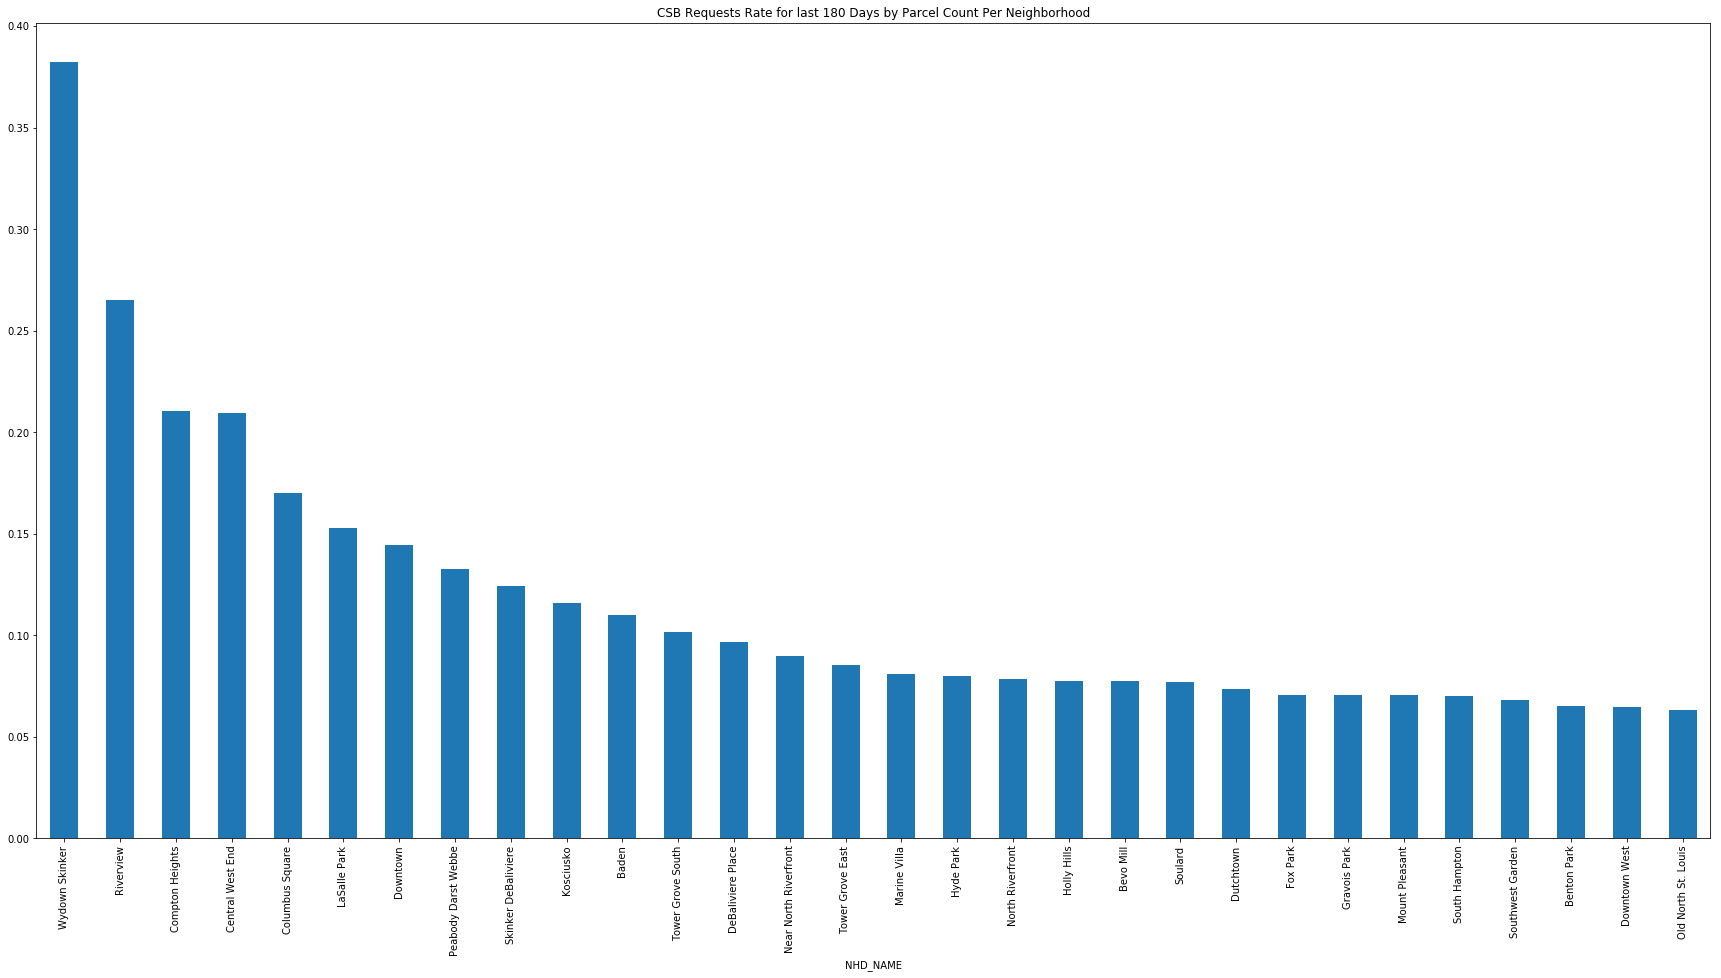

In [37]:
(parcels.groupby('NHD_NAME').CSB_Isues_Last180Days.sum() / parcels_per_neighborhood).sort_values(ascending=False).head(30).plot('bar',figsize=(30,15),title='CSB Requests Rate for last 180 Days by Parcel Count Per Neighborhood')

In [41]:
parcels.groupby('NHD_NAME').CSB_Isues_Last180Days.sum().sort_values(ascending=False).head(30).astype(int)

NHD_NAME
Central West End         1091
Tower Grove South         502
Bevo Mill                 368
Dutchtown                 357
Baden                     318
Downtown                  249
Boulevard Heights         246
Downtown West             209
South Hampton             197
Hyde Park                 179
Tower Grove East          177
Skinker DeBaliviere       175
St. Louis Hills           154
Wydown Skinker            153
Princeton Heights         147
Southwest Garden          144
Carondelet                136
Gravois Park              126
Benton Park               124
Shaw                      121
Soulard                   120
Jeff Vanderlou            118
DeBaliviere Place         114
Compton Heights           111
Lindenwood Park           109
Patch                     104
Near North Riverfront     103
St. Louis Place           102
Marine Villa               99
Holly Hills                98
Name: CSB_Isues_Last180Days, dtype: int64

In [ ]:
parcels[parcels.NHD_NAME=='Marine Villa'].REQUESTID.sum()

In [ ]:
parcels[parcels.NHD_NAME=='Marine Villa'].groupby('OWNERNAME').HANDLE.count().sort_values(ascending=False)

In [ ]:
parcels.columns.Address.unique()

In [48]:
parcels.to_csv('parcels_out.csv')

In [5]:
parcels = pandas.merge(parcels,tax_sales,left_on='SITEADDR',right_on='Address',how='left')

In [6]:
parcels.loc[:,'geometry_centroid'] = parcels.centroid